## Machine Learning
### Goals

  - Evaluate the concepts of machine learning taught in the course


# Challenge

You were hired by an innovative company in the real estate sector as `QuintoAndar, Loft, Terraz, Zap Group (ZAP, Viva Real, DataZAP, FipeZAP, SuaHouse, Geoimóvel, Sub100 and Conecta Imobi) or Imobi Conference`. Your challenge is to support decision making based on data (Data Driven Company).

Nesse sentido, use a base de dados **aptos.csv** para realizar a descoberta do conhecimento e responder a pergunta: 

In this sense, use the **aptos.csv** database to discover knowledge and answer the question:

**`How much is an apartment worth 72m² with 2 bedrooms, 2 parking spaces, renovated in the Center?`**


### Guidelines

Follow the instructions, completing and building the necessary algorithms.

In the cells `Your Code here...` means that it is necessary to implement some code. Use as many blocks (cells) as necessary to create the code.

In the cells `Answer` means that it is necessary a clear and objective answer (can be by text, code, graph, image ...) to the question.

## Rubric for evaluation
    
The criterias for evaluation of the project follows as the rubric.

- R1: Data Exploration (Up to 2 points)
- R2: Descriptive Data Analysis (Up to 2 points)
- R3: Model Development (Up to 2 points)
- R4: Train and Test of the Model (Up to 2 points)
- R5: Final Considerations (Up to 2 points)

**Final_grade = R1 + R2 + R3 + R4 + R5**

## 1. Data Exploration

Load the dataset and inspect the first 15 lines to identify the basic attributes.


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('../dataframe/aptos.csv')

###Comprension of the data

In [3]:
df.head(15)

,metros,valor,quartos,vagas,reformado,bairro
0,107,560.0,3,2,0.0,Vila Lusitania
1,107,555.0,3,2,1.0,Vila Lusitania
2,49,196.0,2,1,0.0,Ferrazopolis
3,104,515.0,3,2,1.0,Centro
4,92,560.0,3,2,1.0,Vila Lusitania
5,51,249.0,2,1,0.0,Taboao
6,140,635.0,4,3,1.0,Centro
7,50,210.0,2,1,1.0,Demarchi
8,93,450.0,3,2,0.0,Baeta Neves
9,107,425.0,3,2,1.0,Rudge Ramos


In [4]:
#Indentifing null values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   metros     114 non-null    int64  
 1   valor      113 non-null    float64
 2   quartos    114 non-null    int64  
 3   vagas      114 non-null    int64  
 4   reformado  113 non-null    float64
 5   bairro     114 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 5.5+ KB


metros       0
valor        1
quartos      0
vagas        0
reformado    1
bairro       0
dtype: int64

In [5]:
df.describe()

,metros,valor,quartos,vagas,reformado
count,114.000000,113.000000,114.000000,114.000000,113.000000
mean,79.500000,401.539823,2.543860,1.675439,0.513274
std,27.516126,171.370059,0.582037,0.722528,0.502050
min,43.000000,188.000000,1.000000,0.000000,0.000000
25%,56.000000,255.000000,2.000000,1.000000,0.000000
50%,71.000000,347.000000,3.000000,2.000000,1.000000
75%,99.000000,515.000000,3.000000,2.000000,1.000000
max,199.000000,880.000000,4.000000,4.000000,1.000000


### `Question:` Do a breif description of each atributte:

Exemple:
- Age: Age of the person in years
- Brand: Car fabricator
- Fuel: Fuel type (gasoline, diesel...)
- Species: Type of flower iris-setosa, virginica... (Target Variable)

###**Answer:**

* Metros: Property size in m²
* Valor: Property value (in thousands of R$) (Target Variable)
* Quartos: Number of rooms in the property
* Vagas: Number of parking spaces in the property
* Reformado: If the property has been renovated (0 = no, 1 = yes)
* Bairro: Property neighborhood

###Name 2 scenarios that may make sense in reading the data presented.

Exemple: 
- I think the price of gasoline goes up with the price of oil. 
- I think that on avarage men are taller than women of the same age.

###**Answer:**

1.  Bigger properties tend to be more expensive.
2.  Renovated properties tend to be more expensive.

## 2. Descriptive Data Analysis

Make an exploratory analysis of the data. Use charts and auxiliary tables, make correlations between the attributes .... With the objective of validating the statements raised above.

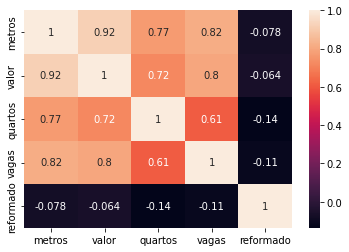

In [6]:
#Case 1: Bigger properties have higher prices

sns.heatmap(df.corr(), annot=True)
plt.show()

* Case 1: Through the heatmap analysis, it was possible to notice that there is a strong correlation (0.92) between the property size and it's value, being this correlation a directly proportional one. 

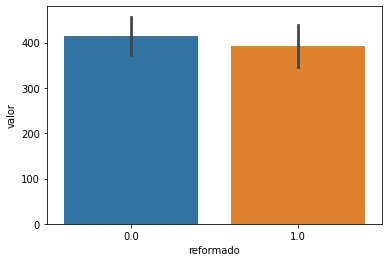

In [7]:
#Case 2: Renovated properties have higher prices

sns.barplot(data=df, x="reformado", y="valor")

plt.show()

* Case 2: Through the barplot analysis, it's possible to notice 2 possible scenarios:
  * There's a weak correlation between the property being renovated and it's value, being this correlation an inversely proportional one (if the property was renovated, it's value tends to be lower).
  * There is no correlation between the property being renovated and it's value.

### __(BONUS: 1 extra  point)__ Outliers Analysis
*This is an extra point, do it if you want...

Analyze and treat **outliers**, as a reference for study:

* [link1](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
* [link2](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
* [link3](https://minerandodados.com.br/tratando-outliers-python/)

###Were locate outliers? Which analysis method did you use? If there were, how did you treat them (were they removed or kept)?

In [8]:
#Treatment of null values
df_trat=df.dropna()
df_trat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 0 to 113
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   metros     112 non-null    int64  
 1   valor      112 non-null    float64
 2   quartos    112 non-null    int64  
 3   vagas      112 non-null    int64  
 4   reformado  112 non-null    float64
 5   bairro     112 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 6.1+ KB


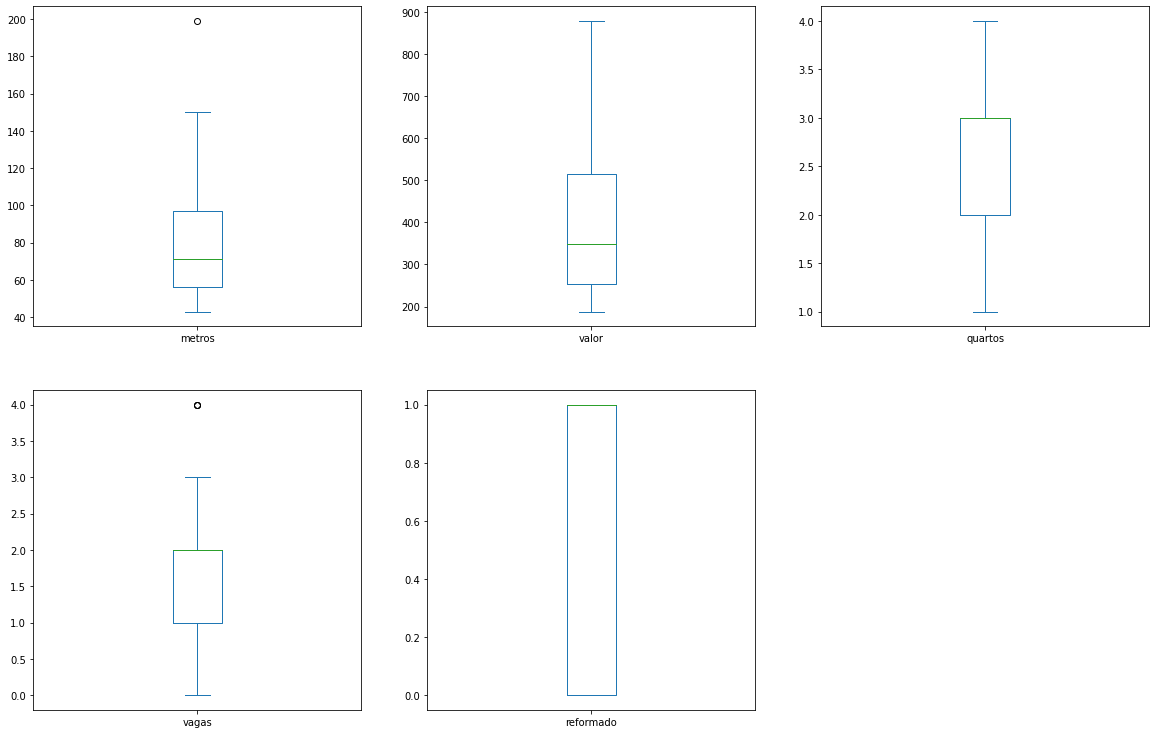

In [9]:
#Indetifying outliers
df_trat.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20, 20))
plt.show()

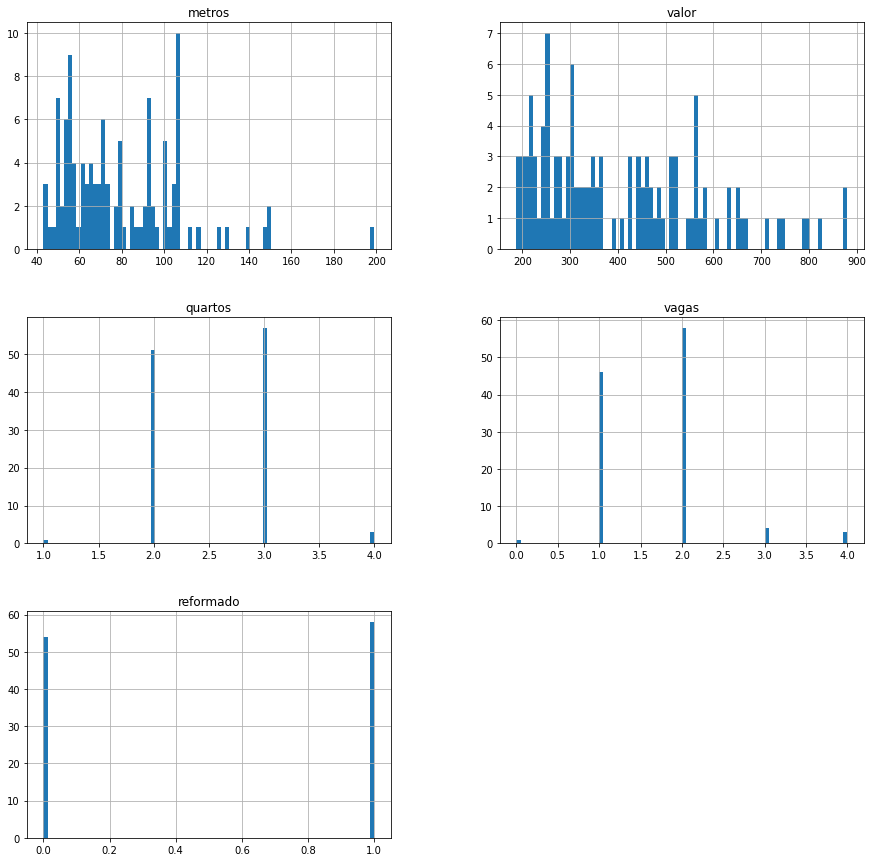

In [10]:
df_trat.hist(bins=80, figsize=(15, 15))
plt.show()

###Answer
* Yes, there were outliers in "quartos", "vagas" and "valor";
* Were used both boxplot, to identify if there were outliers, as well as histograms, to identify their occurrence;
* There was no treatment of the outliers, since they have little representativity.

## 3. Model Development

###The dataset indicates the application of which machine learning model to determine the value of a property? Why?

###**Answer:**

    [ ] Reinforcement learning
    [x] Supervised Learning
    [ ] Unsupervised Learning

* The supervised model is the most appropriate, since we will inform the parameters that the machine will use to make the prediction.

###Which technique is suggested for this project?

###**Answer:**

    [X] Regression
    [ ] Classification
    [ ] Clustering

* The regression technique is the most appropriate, since we want to estimate a numeric value.

###Choose 2 algorithms models to test the performance of each one of them.

###**Answer:**

1. Regression Trees;
2. Random Forest Regression.

###__(BONUS: 1 extra point.)__ Explain how each algorithm works.

###**Answer:**

1. This model consists of a decision tree that, in training, observes different characteristics of the items in the DataFrame in order to be able to, in execution, predict the value of the target;

2. This model consists of a set of Regression Trees, each one with a different set of characteristics, which, in execution, will predict the value of the target, based on the average of the values predicted by each tree.

## 4. Train and Test of the Model

Create a subset of the data only with the attributes that will be used for training and testing the model. Divide the subset into training and test set.

In [49]:
df_treino_teste=pd.get_dummies(df_trat,columns=["bairro"])
df_treino_teste

,metros,valor,quartos,vagas,reformado,bairro_Assuncao,bairro_Baeta Neves,bairro_Centro,bairro_Demarchi,bairro_Ferrazopolis,...,bairro_Jardim do Mar,bairro_Jordanopolis,bairro_Nova Petropolis,bairro_Pauliceia,bairro_Piraporinha,bairro_Planalto,bairro_Rudge Ramos,bairro_Santa Teresinha,bairro_Taboao,bairro_Vila Lusitania
0,107,560.0,3,2,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,107,555.0,3,2,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,49,196.0,2,1,0.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,104,515.0,3,2,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,92,560.0,3,2,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,65,340.0,2,2,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
110,56,247.0,2,1,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
111,126,736.0,3,3,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112,96,560.0,3,1,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
x = df_treino_teste.drop("valor",axis = 1)
y = df_treino_teste.valor

In [51]:
#Splitting the dataset into training and test
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.2, random_state=42)

Train and test the 2 chosen algorithms. Use a metric (ex. R2-score, RMSE and MAE...) to evaluate the performance of the models.

### Algorithm 1 -> Regression Decision Tree

In [164]:
#Importing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

dtr = DecisionTreeRegressor()

In [165]:
#Fitting the data
dtr.fit(x_treino, y_treino)

DecisionTreeRegressor()

In [166]:
#Using the predict method in training data

y_teste_predito_forest = dtr.predict(x_treino)
print("Prediction using regression, returns continuos values: {}".format(y_teste_predito_forest))

Prediction using regression, returns continuos values: [250.         245.         807.5        270.         322.
 460.         319.         300.         798.         255.
 425.         341.33333333 277.         215.         280.
 247.         249.         340.         250.         580.
 450.         710.         565.         220.         560.
 199.         341.33333333 302.         659.         306.
 456.75       280.         367.         330.         456.75
 272.         341.33333333 303.         340.         495.
 515.         247.5        880.         220.         635.
 365.         480.         565.         509.         347.
 227.         303.         456.75       602.5        247.
 736.         580.         300.         515.         215.
 199.         210.         390.         250.         460.
 245.         520.         750.         807.5        422.
 602.5        525.         485.         196.         485.
 195.         200.         217.         307.         456.75
 667.        

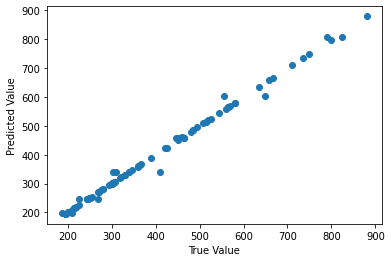

In [167]:
#Evaluation of the parameters in training data

plt.scatter(y_treino, y_teste_predito_forest)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()

In [168]:
#Analysing the results in training data

sse = np.sum((y_teste_predito_forest - y_treino)**2)
mse = mean_squared_error(y_treino, y_teste_predito_forest)
mae = mean_absolute_error(y_treino, y_teste_predito_forest)
rmse = np.sqrt(mean_squared_error(y_treino, y_teste_predito_forest))
r2 = r2_score(y_teste_predito_forest, y_treino)

print(f"Sum of Squared Errors (SSE): {sse:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolut Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R2-score: {r2:.2%}")

Sum of Squared Errors (SSE): 13746.92
Mean Squared Error (MSE): 154.46
Mean Absolut Error (MAE): 4.13
Root Mean Squared Error (RMSE): 12.43
R2-score: 99.47%


In [169]:
#Using the predict method in test data

y_teste_predito = dtr.predict(x_teste)
print("Prediction using regression, returns continuous values {}".format(y_teste_predito))

Prediction using regression, returns continuous values [565.   220.   545.   456.75 307.   347.   515.   307.   422.   247.
 220.   495.   196.   710.   525.   485.   456.75 710.   250.   736.
 255.   340.   390.  ]


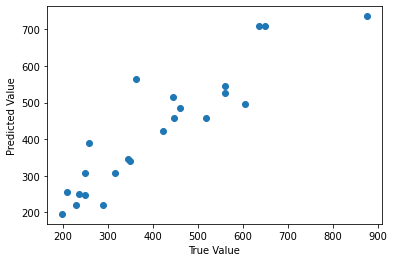

In [170]:
#Evaluation of the parameters in test data

plt.scatter(y_teste, y_teste_predito)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()

In [171]:
#Analysing the results in test data

sse = np.sum((y_teste_predito - y_teste)**2)
mse = mean_squared_error(y_teste, y_teste_predito)
mae = mean_absolute_error(y_teste, y_teste_predito)
rmse = np.sqrt(mean_squared_error(y_teste, y_teste_predito))
r2 = r2_score(y_teste_predito, y_teste)

print(f"Sum of Squared Errors (SSE): {sse:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolut Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R2-score: {r2:.2%}")

Sum of Squared Errors (SSE): 120194.12
Mean Squared Error (MSE): 5225.83
Mean Absolut Error (MAE): 50.13
Root Mean Squared Error (RMSE): 72.29
R2-score: 79.68%


### Algorithm 2 -> Random Forest Regression

In [84]:
#Importing
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

In [85]:
#Fitting the data
rfr.fit(x_treino, y_treino)

RandomForestRegressor()

In [86]:
#Using the predict method in training data
y_teste_predito_forest = rfr.predict(x_treino)
print("Prediction using regression, returns continuous values: {}".format(y_teste_predito_forest))

Prediction using regression, returns continuous values: [241.645      236.14133333 801.565      291.16733333 309.795
 486.785      313.32       261.4        736.97       246.85666667
 504.63333333 336.86185714 266.05666667 230.29       269.66
 247.06666667 250.608      332.64333333 270.61       551.23
 518.6975     660.12916667 470.80352381 242.31       530.565
 203.44233333 336.86185714 267.96       584.195      312.63
 457.5090119  270.26       341.67       318.435      457.5090119
 255.618      336.86185714 306.38       336.07       515.89
 569.725      254.90125    845.46083333 231.78       683.82833333
 376.56666667 500.37       543.53583333 522.12       397.53
 229.00766667 306.38       457.5090119  596.68       247.06666667
 710.76333333 559.46       307.45       534.4875     231.37
 203.44233333 216.26166667 390.68       238.21666667 466.80475
 239.03666667 503.225      688.53166667 801.565      455.644
 596.68       571.355      471.73       206.88       463.91
 206.025      2

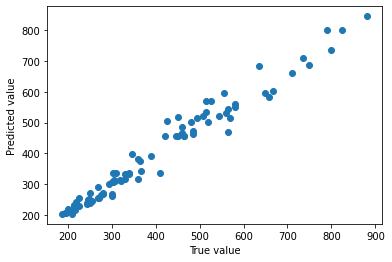

In [87]:
#Evaluation of the parameters in training data

plt.scatter(y_treino, y_teste_predito_forest)
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.show()

In [88]:
#Analysing the results in training data

sse = np.sum((y_teste_predito_forest - y_treino)**2)
mse = mean_squared_error(y_treino, y_teste_predito_forest)
mae = mean_absolute_error(y_treino, y_teste_predito_forest)
rmse = np.sqrt(mean_squared_error(y_treino, y_teste_predito_forest))
r2 = r2_score(y_teste_predito_forest, y_treino)

print(f"Sum of Squared Errors (SSE): {sse:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolut Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R2-score: {r2:.2%}")

Sum of Squared Errors (SSE): 85972.04
Mean Squared Error (MSE): 965.98
Mean Absolut Error (MAE): 23.17
Root Mean Squared Error (RMSE): 31.08
R2-score: 96.32%


In [89]:
#Using the predict method in test data

y_teste_predito_forest = rfr.predict(x_teste)
print("Prediction using regression, returns continuous values: {}".format(y_teste_predito_forest))

Prediction using regression, returns continuous values: [473.41394048 243.645      521.1175     457.5090119  304.54
 438.685      569.725      306.92       455.644      247.06666667
 242.31       515.89       214.308      620.13416667 550.3125
 471.73       457.5090119  600.135      238.08       664.06583333
 240.03166667 332.64333333 395.93666667]


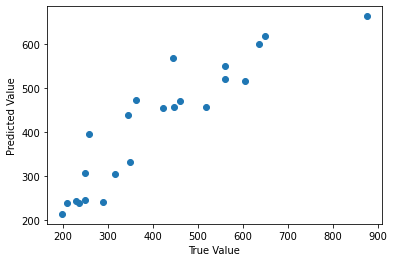

In [90]:
#Evaluation of the parameters in test data

plt.scatter(y_teste, y_teste_predito_forest)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()

In [91]:
#Analysing the results in test data

sse = np.sum((y_teste_predito_forest - y_teste)**2)
mse = mean_squared_error(y_teste, y_teste_predito_forest)
mae = mean_absolute_error(y_teste, y_teste_predito_forest)
rmse = np.sqrt(mean_squared_error(y_teste, y_teste_predito_forest))
r2 = r2_score(y_teste_predito_forest, y_teste)

print(f"Sum of Squared Errors (SSE): {sse:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolut Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R2-score: {r2:.2%}")

Sum of Squared Errors (SSE): 123934.66
Mean Squared Error (MSE): 5388.46
Mean Absolut Error (MAE): 51.82
Root Mean Squared Error (RMSE): 73.41
R2-score: 71.52%


Sumarize in the table below the results obtained for the training and test datasets

###**Resposta:**

|    | algoritmo1 | algoritmo2 |
|:---:|:---:|:---:|
| treino (R²) | 99.47% | 96.32% |
| teste (R²)  | 79.68% | 71.52% |

###Which algorithm had the best result? Justify

###**Answer:** 
The first algorithm, Regression Tree, had a better result;

Not only did it have a higher R² score, having a lower error rate, but it tends to be more reliable, since its algorithm, in test, reached a precision above 99% the R² score.

## Production model: Test with new data

Use your trained model to determine:

**`How much is a 72m2 apartment with 2 rooms, 2 parking spaces, renovated in the Center worth?`**	

In [30]:
df_treino_teste.columns

Index(['metros', 'valor', 'quartos', 'vagas', 'reformado', 'bairro_Assuncao',
       'bairro_Baeta Neves', 'bairro_Centro', 'bairro_Demarchi',
       'bairro_Ferrazopolis', 'bairro_Independencia', 'bairro_Iraja',
       'bairro_Jardim do Mar', 'bairro_Jordanopolis', 'bairro_Nova Petropolis',
       'bairro_Pauliceia', 'bairro_Piraporinha', 'bairro_Planalto',
       'bairro_Rudge Ramos', 'bairro_Santa Teresinha', 'bairro_Taboao',
       'bairro_Vila Lusitania'],
      dtype='object')

In [31]:
#Ignoring warning
import warnings
warnings.simplefilter("ignore")

In [32]:
#Value
print(f"Predicted value: R${(dtr.predict([[72,2,2,1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])[0])*1000:.2f}")

Predicted value: R$341333.33


## 5. Final considerations

Phew!!... We have reached the end. Congratulations! In a simplified and complete way, we have gone through all the steps of a machine learning project. Other steps can be added in the data treatment and model development.

###The developed model had a satisfactory result? Justify:


###**Answer**:
Yes, the result was satisfactory, since both models reached an accuracy rate of over 70% in the R² score rate, with the first algorithm, Regression Tree, almost reaching 80% of accuracy, in the same parameter.

###What would you do differently to improve the result obtained? Justify:

###**Answer**:
One possibility would be to treat the outliers, since they may have changed some decision node of one or more trees of the Random Forrest model.

Another possibility would be to make a subdataset without the "reformado" field, since it was observed that this field changes little to nothing the value of the property, which may have caused some bias in the training.